# Hongfan Lu - PSet 3

### Q1: Organizing the data into a Document-term matrix
Write code to organize the cleaned data from your previous assignment submission into a document term matrix (DTM) format. Make sure to exclude common English stopwords.

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Importing the cleaned trump tweets made from PSet 2
trump = pd.read_csv('trump_tweets_cleaned.csv')
trump['text'] = trump['text'].fillna('')

In [3]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text #text contains the stopword list for sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Add stop words
stop_words = text.ENGLISH_STOP_WORDS
stop_words = list(stop_words)

# Create document-term matrix
cv = CountVectorizer(stop_words=stop_words) # Excluding English Stopwords
data_cv = cv.fit_transform(trump.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = trump.index #new document-term matrix that excludes those stopwords

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [4]:
data_stop.head(2)

,00,00am,00ame,00p,00pm,00pme,01,02,03,04,...,모습,바라보며,받고,북측을,브리핑을,오울렛,정상의,초소는,초소에서,한국전쟁
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Q2) Most common words
Using the DTM matrix that you have just built, write code to find the top 30 most common words. What can you infer by seeing the top 30 words?

In [5]:
data_stop = data_stop.transpose()

In [6]:
data_stop.head(2)

,0,1,2,3,4,5,6,7,8,9,...,18491,18492,18493,18494,18495,18496,18497,18498,18499,18500
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
00am,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Get most common word for each documents (trump's tweet)
top_dict = {}

for c in data_stop.columns:
    top = data_stop[c].sort_values(ascending = False).head(1)
    top_dict[c] = list(zip(top.index,top.values))

In [8]:
words = []
for c in data_stop.columns:
    top = [word for (word, count) in top_dict[c]]
    for t in top:
        words.append(t)

In [9]:
Counter(words).most_common(32)

[('00', 812),
 ('amp', 415),
 ('great', 296),
 ('president', 244),
 ('realdonaldtrump', 147),
 ('thank', 136),
 ('media', 133),
 ('people', 127),
 ('day', 123),
 ('today', 118),
 ('democrats', 109),
 ('impeachment', 109),
 ('trump', 108),
 ('make', 102),
 ('big', 99),
 ('border', 95),
 ('china', 92),
 ('russia', 90),
 ('fake', 90),
 ('country', 87),
 ('america', 86),
 ('american', 84),
 ('just', 81),
 ('vote', 80),
 ('want', 74),
 ('states', 71),
 ('way', 70),
 ('jobs', 69),
 ('work', 63),
 ('news', 56),
 ('honor', 55),
 ('new', 54)]

In the cell above, I printed out the top 32 words that Trump like to use in his posts (due to the first 2 are blank words and 'amp' representing ampersand). I can generally see the major topics that were surrounding Trump's presidency:

- 'great': he likes to say great a lot.
- 'democrats' 'impeachment': the impeachment towards the end of his presidency bothered him a lot.
- 'make' 'great' 'america': Make America Great Again (MAGA)?
- 'border': the southern border crisis and the wall that Trump claimed success on
- 'china' 'russia': two countries that were brought up a lot.

### Q3) Visualize the data
Repeat your inference by visualizing the most frequent words in your corpus. You need to show at least two visualizations. What can you infer from the visuals? If you decide to slice the data in some way or take a smaller sample for visualizing, provide a rationale for how you sampled and why. Present your response in the QQQ format, i.e., 
- (1) provide a rationale for your choice of visuals, and/or slicing of data, 
- (2) write code, and 
- (3) draw inference from analysis and visuals.

First, I will create a wordcloud. The wordcloud can help people easily spot the most mentioned words since they are enlarged.

In [10]:
from wordcloud import WordCloud

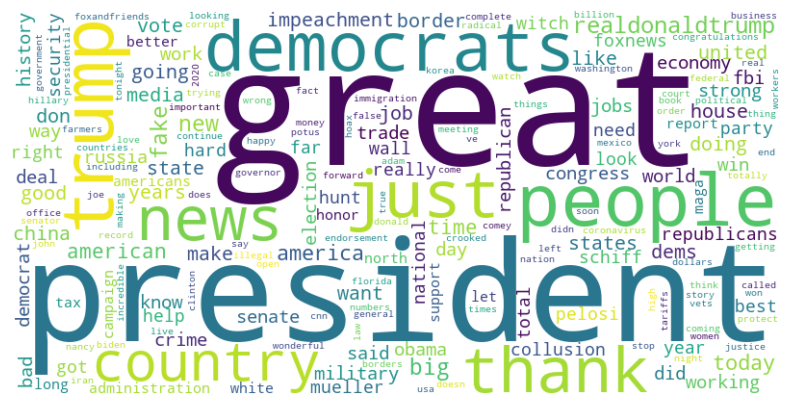

In [11]:
# Convert the DataFrame to a dictionary where keys are words and values are their frequencies
word_freq = data_stop.sum(axis = 1).to_dict()

# Get rid of the ampersand words in the dictionary since it does not mean anything
if 'amp' in word_freq:
    del word_freq['amp']

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the Wordcloud above, we can see that 'great', 'president', 'democrats', 'people' are very obvious. This visualization is showing us again what are the most mentioned topics in Trump's tweets.

Secondly, I will try the bar chart for the top 40 words in term of frequencies.

In [12]:
sorted_word_count = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_40_words = sorted_word_count[:40]
words = [pair[0] for pair in top_40_words]
freqs = [pair[1] for pair in top_40_words]

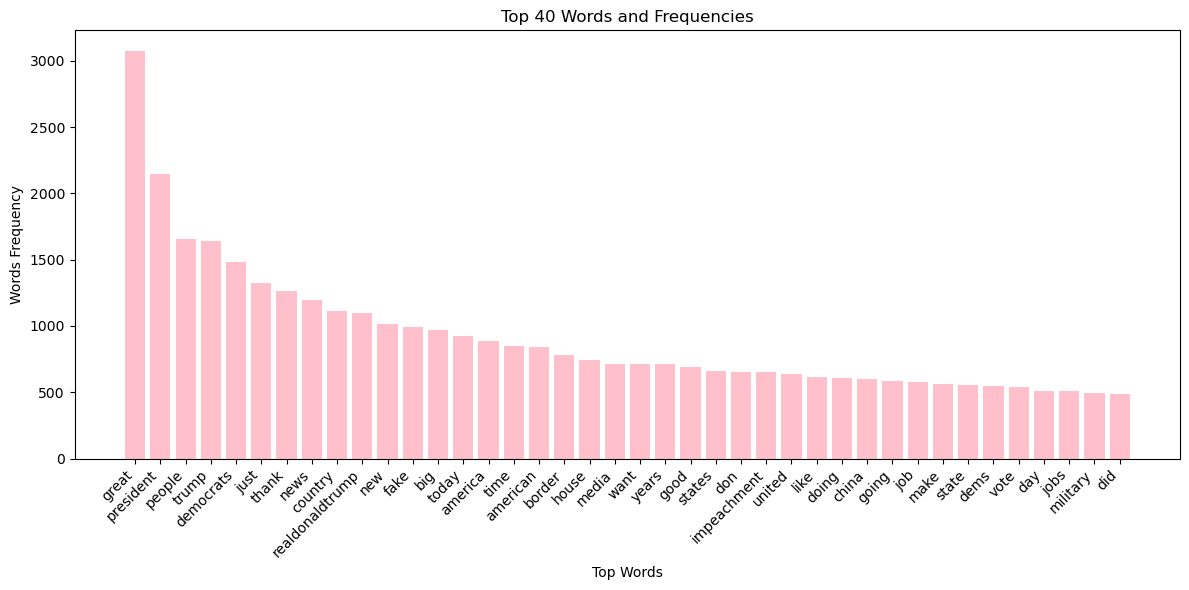

In [13]:
plt.figure(figsize = (12, 6))
plt.bar(words, freqs, color = 'pink')
plt.xlabel('Top Words')
plt.ylabel('Words Frequency')
plt.title('Top 40 Words and Frequencies')
plt.xticks(rotation = 45,ha='right')
plt.tight_layout()
plt.show()

The bar chart of the top 40 words frequencies provide us a better idea in terms of the comparative values and size of each words.

### Q4) Profanity in your data
In this question, you will determine the amount of profanity in your data. Again, you need to report your response in the QQQ format. First, explain in markdown how you defined profanity and what decisions you made to detect profanity in your data. Next, write code to find the amount of profanity and show output. Finally, draw inferences from your analysis and visuals.

Answer:

Profanity is a type of language that is often considered offensive, vulger and obscene. 

I search online which profanity words did Trump used during his presidency and searched them below.

In [14]:
bad_words = data_stop.transpose()[['bullshit','asshole', 'shit']]
data_profanity = pd.concat([bad_words.bullshit,bad_words.asshole, bad_words.shit], axis=1)
data_profanity.columns = ['bullxxxx','axxhole', 's_word']
mask = (data_profanity != 0).any(axis = 1)
filtered_profanity = data_profanity[mask]
filtered_profanity

,bullxxxx,axxhole,s_word
408,0,1,0
765,0,0,1
5064,0,0,1
6651,1,0,0
7415,1,0,0
7694,1,0,0
7798,0,0,1
10685,0,0,1
11292,1,0,0


In [15]:
filtered_profanity_transpose = filtered_profanity.transpose()

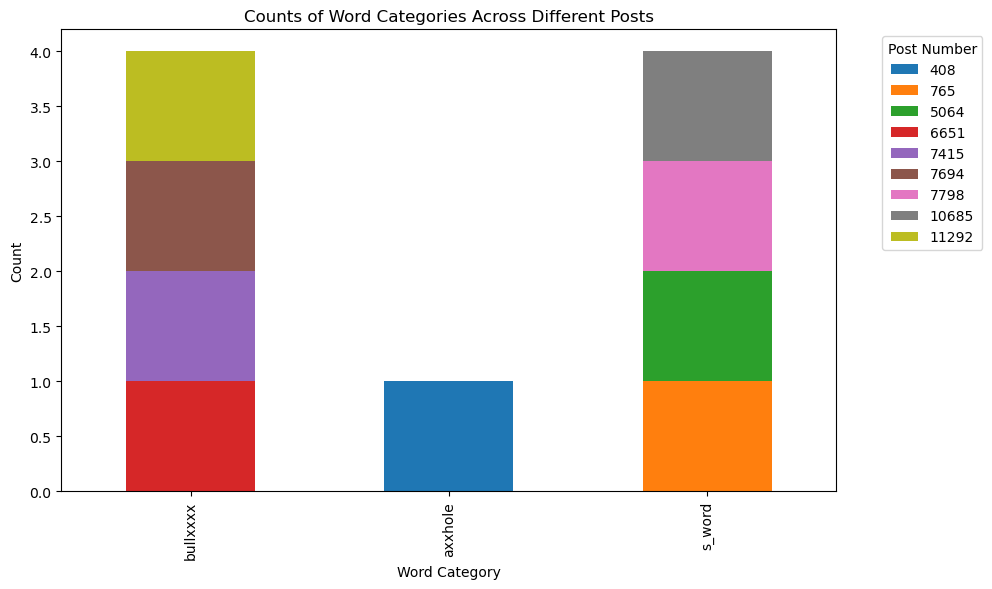

In [16]:
filtered_profanity_transpose.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel('Word Category')
plt.ylabel('Count')
plt.title('Counts of Word Categories Across Different Posts')
plt.legend(title='Post Number', bbox_to_anchor=(1.05, 1), loc='upper left')

Overall, Trump's use of profanity was rare in terms of the absolute number of posts he made.

### Q5) Find topics using topic modeling
What are some key topics you can find in your dataset? Report your response in the QQQ format. First, explain all the decisions you are making before even trying to run topic modeling, then provide code for topic modeling and show output, and finally provide inferences and conclusions.

Did you get reasonable results in your first attempt? If not, show additional attempts (at least one more) and provide your rationale, code, and inference in QQQ format again.

Answer

Recall the top words detected above using top words:

    'great': he likes to say great a lot.
    'democrats' 'impeachment': the impeachment towards the end of his presidency bothered him a lot.
    'make' 'great' 'america': Make America Great Again (MAGA)?
    'border': the southern border crisis and the wall that Trump claimed success on
    'china' 'russia': two countries that were brought up a lot.

Based on the topics mentioed above, I will start from testing for 4 topics for the LDA.

In [17]:
# Import the necessary modules for LDA with gensim. 
from gensim import matutils, models
import scipy.sparse

In [18]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data_stop)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [19]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [20]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.017*"news" + 0.015*"fake" + 0.012*"trump" + 0.012*"amp" + 0.011*"democrats" + 0.010*"media" + 0.009*"just" + 0.009*"people" + 0.008*"president" + 0.007*"russia"'),
 (1,
  '0.020*"thank" + 0.018*"president" + 0.016*"great" + 0.014*"today" + 0.013*"realdonaldtrump" + 0.010*"trump" + 0.008*"amp" + 0.007*"american" + 0.007*"honor" + 0.006*"tonight"'),
 (2,
  '0.020*"great" + 0.016*"amp" + 0.011*"country" + 0.010*"border" + 0.010*"jobs" + 0.010*"big" + 0.008*"people" + 0.007*"vote" + 0.007*"china" + 0.007*"tax"'),
 (3,
  '0.027*"great" + 0.016*"states" + 0.016*"united" + 0.009*"america" + 0.009*"whitehouse" + 0.009*"forward" + 0.007*"court" + 0.007*"make" + 0.007*"meeting" + 0.007*"today"')]

The topics labeled by LDA above all make sense! I think they are:
1. About board safety and MAGA
2. About impeachment and russia or collusion
3. Fake new! Great news~
4. something about north korea and white house honor.

Although make sense, I think the actual corpus can be further extended. Therefore, I will try 8 topics below.

In [21]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=8, passes=10)
lda.print_topics()

[(0,
  '0.023*"border" + 0.020*"great" + 0.016*"strong" + 0.015*"amp" + 0.014*"security" + 0.014*"crime" + 0.013*"military" + 0.013*"people" + 0.011*"vote" + 0.011*"country"'),
 (1,
  '0.015*"hillary" + 0.011*"amp" + 0.011*"court" + 0.010*"fbi" + 0.009*"crooked" + 0.009*"clinton" + 0.009*"foxnews" + 0.008*"comey" + 0.008*"00" + 0.008*"tonight"'),
 (2,
  '0.064*"great" + 0.038*"thank" + 0.021*"america" + 0.012*"congratulations" + 0.012*"new" + 0.012*"today" + 0.010*"make" + 0.010*"day" + 0.009*"happy" + 0.008*"maga"'),
 (3,
  '0.019*"today" + 0.018*"president" + 0.015*"meeting" + 0.014*"north" + 0.013*"amp" + 0.012*"whitehouse" + 0.012*"forward" + 0.011*"realdonaldtrump" + 0.011*"china" + 0.010*"women"'),
 (4,
  '0.023*"jobs" + 0.021*"amp" + 0.016*"great" + 0.015*"tax" + 0.015*"big" + 0.011*"years" + 0.009*"new" + 0.009*"deal" + 0.008*"healthcare" + 0.008*"cuts"'),
 (5,
  '0.041*"news" + 0.037*"fake" + 0.026*"media" + 0.014*"united" + 0.014*"people" + 0.014*"states" + 0.011*"just" + 0.0

I think the above topics are:

1. Border security, MAGA, military
2. great job American people
3. FoxNews interviews are enjoyable
4. democrates impeachment is a waste of tax dollars
5. fake new media mentioned FBI, Russia and impeachment
6. trump will MAGA
7. China trade war
8. big tax cut republican

### Q6) Answering additional questions with this data
In addition to the questions you answered so far with the data, pick one additional question of your choice that you can answer with additional analysis. In Assignment 2, you had already listed several compelling questions. You can pick one of those questions or you can come up with a new question. Use the QQQ format to answer this question. Make sure that your question is such that you need to do some non-trivial analysis of the data.

My original question asked about Trump's main twitter strategy for the China topic. Below is a deeper dive.

In [22]:
china = data_stop.transpose()[["china","war", "tariffs", "deal","trade", "imports", "exports"]]

In [23]:
data_china = pd.concat([china.china,china.war, china.tariffs, china.deal, china.trade, china.imports, china.exports], axis=1)
data_china.columns = ["china","war", "tariffs", "deal","trade", "imports", "exports"]
mask = (data_china != 0).any(axis = 1)
filtered_china = data_china[mask]
# filtered_china

Now, I have the indexes of the tweets that mentioned China. I will do a further LDA analysis for theme analysis.

In [24]:
china_index = list(filtered_china.index)

In [25]:
china_tweets = pd.DataFrame(trump.iloc[china_index]['text'])

In [26]:
china_tweets.text

10       The Radical Left Lamestream Media together wit...
16       We have informed both India and China that the...
51                                                  CHINA!
53       “The President has been targeted by Twitter.” ...
54       Twitter is doing nothing about all of the lies...
                               ...                        
18420    Iran has been formally PUT ON NOTICE for firin...
18424    Do you believe it? The Obama Administration ag...
18442    ...Senators should focus their energies on ISI...
18457    Mexico has taken advantage of the U.S. for lon...
18464    The U.S. has a 60 billion dollar trade deficit...
Name: text, Length: 1150, dtype: object

In [27]:
# Create document-term matrix
cv_china = CountVectorizer(stop_words=stop_words) # Excluding English Stopwords
data_cv_china = cv_china.fit_transform(china_tweets.text)
data_stop_china = pd.DataFrame(data_cv_china.toarray(), columns=cv_china.get_feature_names_out())
data_stop_china.index = china_tweets.index #new document-term matrix that excludes those stopwords

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_china.pkl", "wb"))
data_stop.to_pickle("dtm_stop_china.pkl")

In [28]:
data_stop_china = data_stop_china.transpose()

In [29]:
# Get most common word for each documents (trump's tweet)
top_dict_china = {}

for c in data_stop_china.columns:
    top = data_stop_china[c].sort_values(ascending = False).head(4)
    top_dict_china[c] = list(zip(top.index,top.values))

In [30]:
words_china = []
for c in data_stop_china.columns:
    top = [word for (word, count) in top_dict_china[c]]
    for t in top:
        words_china.append(t)

In [31]:
Counter(words_china).most_common(30)

[('china', 186),
 ('deal', 137),
 ('trade', 129),
 ('amp', 67),
 ('tariffs', 55),
 ('great', 52),
 ('president', 47),
 ('war', 45),
 ('united', 41),
 ('country', 34),
 ('mexico', 30),
 ('big', 29),
 ('iran', 29),
 ('korea', 29),
 ('countries', 28),
 ('good', 27),
 ('years', 27),
 ('world', 26),
 ('billion', 26),
 ('deals', 25),
 ('states', 25),
 ('trump', 25),
 ('new', 24),
 ('people', 24),
 ('dollars', 23),
 ('just', 22),
 ('make', 21),
 ('north', 20),
 ('working', 19),
 ('doing', 17)]

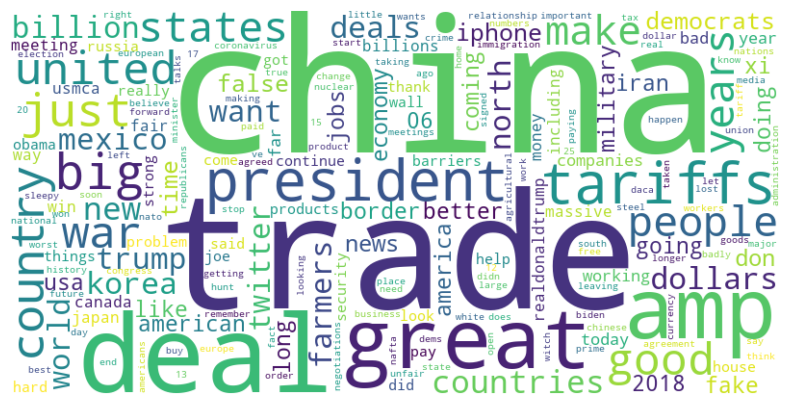

In [32]:
# Convert the DataFrame to a dictionary where keys are words and values are their frequencies
word_freq_china = data_stop_china.sum(axis = 1).to_dict()

# Get rid of the ampersand words in the dictionary since it does not mean anything
if 'amp' in word_freq:
    del word_freq['amp']

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_china)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
sparse_counts = scipy.sparse.csr_matrix(data_stop_china)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [34]:
cv = pickle.load(open("cv_stop_china.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [35]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=8, passes=10)
lda.print_topics()

[(0,
  '0.008*"cowers" + 0.007*"28000" + 0.007*"contingency" + 0.005*"criticized" + 0.004*"africa" + 0.004*"9m" + 0.003*"crowdwe" + 0.003*"caught" + 0.003*"candid" + 0.003*"berniesanders"'),
 (1,
  '0.027*"9m" + 0.008*"28000" + 0.006*"caught" + 0.005*"congressioal" + 0.005*"berniesanders" + 0.005*"applying" + 0.004*"bryan" + 0.004*"crovatto" + 0.004*"africa" + 0.004*"attended"'),
 (2,
  '0.015*"coordinate" + 0.015*"begging" + 0.014*"appointed" + 0.012*"02" + 0.012*"13164" + 0.005*"10netanyahu" + 0.005*"116973" + 0.004*"candid" + 0.004*"603" + 0.004*"administrations"'),
 (3,
  '0.002*"cowers" + 0.001*"covington" + 0.001*"cowardice" + 0.001*"armed" + 0.001*"boycotted" + 0.001*"cooked" + 0.001*"communicated" + 0.001*"batch" + 0.001*"absolutely" + 0.001*"armynavygame"'),
 (4,
  '0.026*"africa" + 0.026*"9m" + 0.025*"contingency" + 0.011*"attended" + 0.010*"28000" + 0.009*"congressioal" + 0.008*"caught" + 0.007*"corona" + 0.007*"bonus" + 0.007*"500th"'),
 (5,
  '0.016*"9m" + 0.014*"contingen

It is interesting to see that Trump's 8 topics about China all include some kind of trade, tariffs or deals. This sounds less than what I expected; I was expecting strong language about stealing IP or so. So may be Trump's main topic was the tariffs.